# k-Nearest Neighbors (k-NN) Classification From Scratch

k-NN is a simple, instance-based learning algorithm that classifies new data points based on the majority class of their k nearest neighbors.

## Key Concepts:
- **Instance-Based Learning**: No explicit training phase
- **Distance Metrics**: Euclidean, Manhattan, etc.
- **Majority Voting**: Classification based on k nearest neighbors
- **Hyperparameter k**: Number of neighbors to consider

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Mathematical Foundation

### Distance Metrics:

**Euclidean Distance:**
$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

**Manhattan Distance:**
$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

### Classification Rule:
$$\hat{y} = \text{mode}\{y_1, y_2, ..., y_k\}$$

where $y_1, ..., y_k$ are the labels of the k nearest neighbors.

## 2. Implementation

In [2]:
class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean'):
        """
        Initialize k-NN Classifier
        
        Parameters:
        -----------
        k : int
            Number of neighbors to consider (default=3)
        distance_metric : str
            Distance metric to use: 'euclidean' or 'manhattan'
        """
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        'Train' the model (just store the training data)
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        y : array-like, shape (n_samples,)
        """
        self.X_train = X
        self.y_train = y
        return self
    
    def _calculate_distance(self, x1, x2):
        """
        Calculate distance between two points
        """
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")
    
    def _predict_single(self, x):
        """
        Predict class for a single sample
        """
        # Calculate distances to all training samples
        distances = [self._calculate_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get labels of k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X):
        """
        Predict classes for multiple samples
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        
        Returns:
        --------
        predictions : array, shape (n_samples,)
        """
        return np.array([self._predict_single(x) for x in X])
    
    def score(self, X, y):
        """
        Calculate accuracy score
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        y : array-like, shape (n_samples,)
        
        Returns:
        --------
        accuracy : float
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

## 3. Testing on Iris Dataset

In [3]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {len(np.unique(y))} ({iris.target_names})")

Training samples: 105
Test samples: 45
Features: 4
Classes: 3 (['setosa' 'versicolor' 'virginica'])


In [4]:
# Train k-NN Classifier
knn = KNNClassifier(k=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

# Calculate accuracy
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)

print(f"\nk-NN Classifier (k={knn.k})")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


k-NN Classifier (k=5)
Train Accuracy: 0.9524
Test Accuracy: 1.0000


## 4. Comparison with Scikit-learn

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Train sklearn k-NN
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train_scaled, y_train)

# Compare accuracy
sklearn_train_acc = sklearn_knn.score(X_train_scaled, y_train)
sklearn_test_acc = sklearn_knn.score(X_test_scaled, y_test)

print("\nComparison:")
print(f"{'Method':<20} {'Train Acc':<12} {'Test Acc':<12}")
print("-" * 44)
print(f"{'Our k-NN':<20} {train_acc:<12.4f} {test_acc:<12.4f}")
print(f"{'Sklearn k-NN':<20} {sklearn_train_acc:<12.4f} {sklearn_test_acc:<12.4f}")


Comparison:
Method               Train Acc    Test Acc    
--------------------------------------------
Our k-NN             0.9524       1.0000      
Sklearn k-NN         0.9524       1.0000      


## 5. Effect of k (Number of Neighbors)

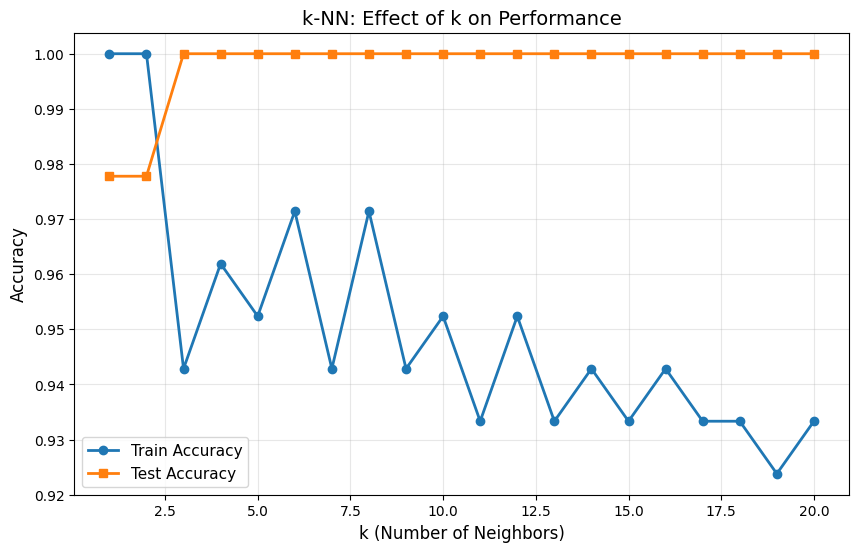


Best k: 3
Best Test Accuracy: 1.0000


In [6]:
# Test different k values
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train_scaled, y_train)
    
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, 'o-', label='Train Accuracy', linewidth=2)
plt.plot(k_values, test_accuracies, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('k-NN: Effect of k on Performance', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Find best k
best_k = k_values[np.argmax(test_accuracies)]
best_acc = max(test_accuracies)
print(f"\nBest k: {best_k}")
print(f"Best Test Accuracy: {best_acc:.4f}")

## 6. Distance Metric Comparison

In [7]:
# Compare Euclidean vs Manhattan distance
knn_euclidean = KNNClassifier(k=5, distance_metric='euclidean')
knn_manhattan = KNNClassifier(k=5, distance_metric='manhattan')

knn_euclidean.fit(X_train_scaled, y_train)
knn_manhattan.fit(X_train_scaled, y_train)

euclidean_acc = knn_euclidean.score(X_test_scaled, y_test)
manhattan_acc = knn_manhattan.score(X_test_scaled, y_test)

print("\nDistance Metric Comparison:")
print(f"Euclidean Distance: {euclidean_acc:.4f}")
print(f"Manhattan Distance: {manhattan_acc:.4f}")


Distance Metric Comparison:
Euclidean Distance: 1.0000
Manhattan Distance: 1.0000


## 7. Decision Boundary Visualization (2D)

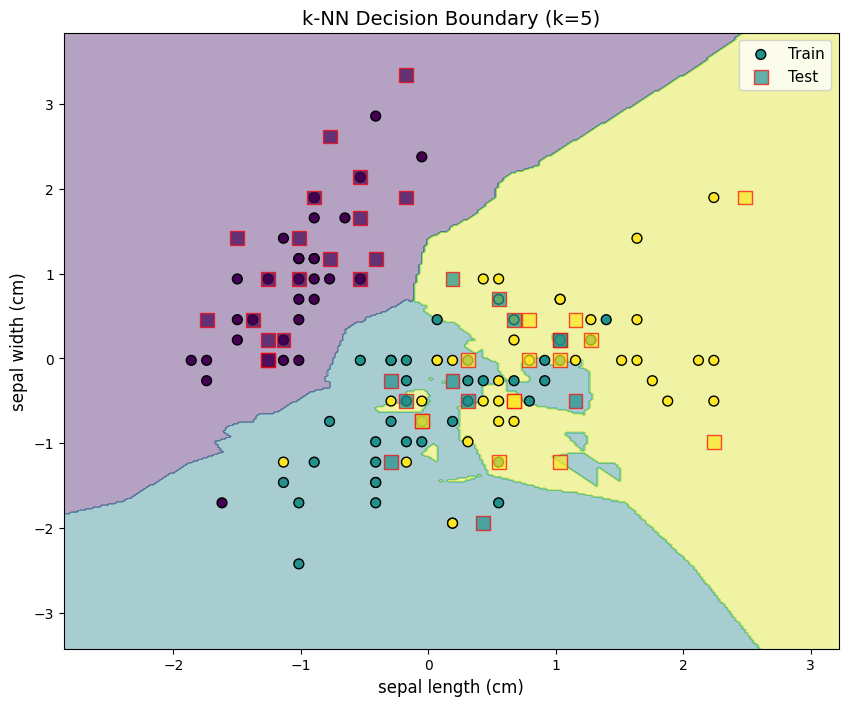

In [8]:
# Use only 2 features for visualization
X_2d = X[:, :2]  # First two features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42
)

# Standardize
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Train k-NN
knn_2d = KNNClassifier(k=5)
knn_2d.fit(X_train_2d_scaled, y_train_2d)

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], 
           c=y_train_2d, cmap='viridis', edgecolor='black', s=50, label='Train')
plt.scatter(X_test_2d_scaled[:, 0], X_test_2d_scaled[:, 1], 
           c=y_test_2d, cmap='viridis', edgecolor='red', s=100, 
           marker='s', label='Test', alpha=0.7)
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)
plt.title(f'k-NN Decision Boundary (k={knn_2d.k})', fontsize=14)
plt.legend(fontsize=11)
plt.show()

## 8. Key Takeaways

### Advantages:
- ✅ Simple and intuitive
- ✅ No training phase (lazy learning)
- ✅ Works well with small datasets
- ✅ Naturally handles multi-class problems
- ✅ No assumptions about data distribution

### Disadvantages:
- ❌ Slow prediction (must compute all distances)
- ❌ Sensitive to feature scaling
- ❌ Curse of dimensionality (poor with many features)
- ❌ Sensitive to irrelevant features
- ❌ Requires choosing k hyperparameter

### When to Use:
- Small to medium-sized datasets
- Low-dimensional feature space
- Non-linear decision boundaries
- Need interpretable results
- Baseline model for comparison